In [47]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [48]:
data = pl.scan_csv("cleaned_movie_data.csv")

In [ ]:
data.schema

OrderedDict([('movieId', Int64),
             ('userId', Int64),
             ('rating', Float64),
             ('Title', String),
             ('Year', Int64),
             ('Rated', String),
             ('Runtime', Int64),
             ('Director', String),
             ('Actors', String),
             ('Plot', String),
             ('Language', String),
             ('Country', String),
             ('Poster', String),
             ('imdbRating', Float64),
             ('Type', String),
             ('Genres', String)])

In [49]:
movie_data = data.collect()
movie_data

movieId,userId,rating,Title,Year,Rated,Runtime,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres
i64,i64,f64,str,i64,str,i64,str,str,str,str,str,str,f64,str,str
256,209929,1.0,"""Junior""",1994,"""PG-13""",109,"""Ivan Reitman""","""Arnold Schwarz…","""As part of a f…","""German, Englis…","""United States""","""https://m.medi…",4.7,"""movie""","""Comedy, Romanc…"
6539,238309,5.0,"""Pirates of the…",2003,"""PG-13""",143,"""Gore Verbinski…","""Johnny Depp, G…","""Blacksmith Wil…","""English""","""United States""","""https://m.medi…",8.1,"""movie""","""Action, Advent…"
94677,186814,5.0,"""Dictator""",2016,"""Not Rated""",155,"""Sriwass""","""Nandamuri Bala…","""Chandu lives a…","""Telugu""","""India""","""https://m.medi…",4.1,"""movie""","""Action, Drama"""
71535,225147,5.0,"""Zombieland""",2009,"""R""",88,"""Ruben Fleische…","""Jesse Eisenber…","""A shy student …","""English, Spani…","""United States""","""https://m.medi…",7.6,"""movie""","""Action, Comedy…"
87222,45226,4.0,"""Kung Fu Panda …",2011,"""PG""",90,"""Jennifer Yuh N…","""Jack Black, An…","""Po and his fri…","""English, Russi…","""United States,…","""https://m.medi…",7.2,"""movie""","""Animation, Act…"
4718,74971,2.5,"""American Pie 2…",2001,"""R""",108,"""J.B. Rogers""","""Jason Biggs, S…","""Jim and his fr…","""English""","""United States""","""https://m.medi…",6.4,"""movie""","""Comedy"""
48394,262586,4.5,"""Pan's Labyrint…",2006,"""R""",118,"""Guillermo del …","""Ivana Baquero,…","""In the Falangi…","""Spanish""","""Mexico,Spain""","""https://m.medi…",8.2,"""movie""","""Drama, Fantasy…"
180,248601,3.0,"""Mallrats""",1995,"""R""",94,"""Kevin Smith""","""Shannen Dohert…","""Both dumped by…","""English""","""United States""","""https://m.medi…",7.0,"""movie""","""Comedy, Romanc…"
37741,13101,3.0,"""Capote""",2005,"""R""",114,"""Bennett Miller…","""Philip Seymour…","""In 1959, Truma…","""English""","""United States,…","""https://m.medi…",7.3,"""movie""","""Biography, Cri…"


In [ ]:
movie_data.columns

['movieId',
 'userId',
 'rating',
 'Title',
 'Year',
 'Rated',
 'Runtime',
 'Director',
 'Actors',
 'Plot',
 'Language',
 'Country',
 'Poster',
 'imdbRating',
 'Type',
 'Genres']

### Univariate Analysis

In [ ]:
movie_data.null_count()

movieId,userId,rating,Title,Year,Rated,Runtime,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


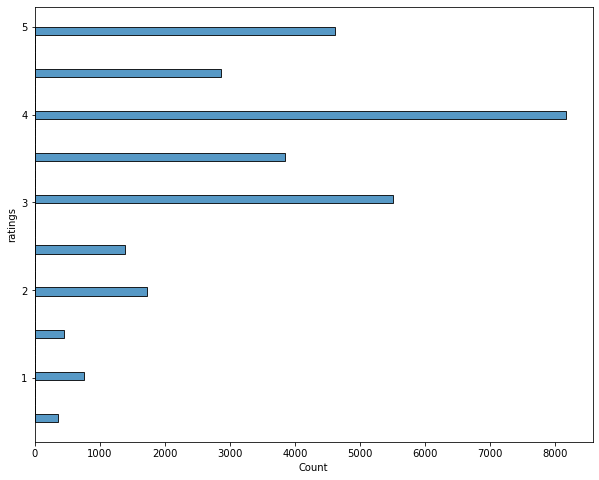

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(y=movie_data['rating'].to_numpy())
plt.ylabel('ratings')
plt.show()

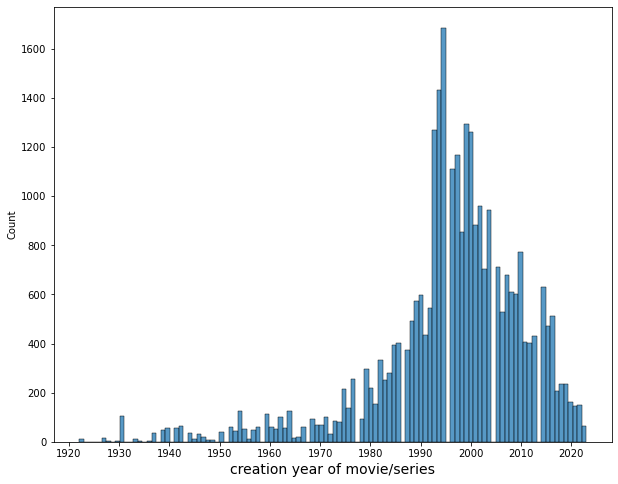

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(movie_data['Year'].to_numpy())
plt.xlabel("creation year of movie/series",fontsize=14)
plt.xticks(np.arange(1920,2030,10))
plt.show()

more movies were produced mainly in late 90's and early 2000's, movies available also depend on if users have watched, in these times the internet and colored television just came out

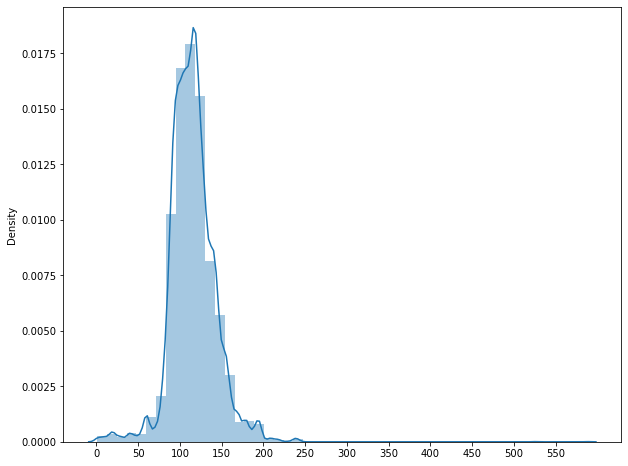

In [ ]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,8))
sns.distplot(movie_data['Runtime'].to_numpy())
plt.xticks(np.arange(0,600,50))
plt.show()

In [ ]:
movie_data['Runtime'].mean()

115.33694883282244

Movies average over 100mins that's from an 1h40m to 2h

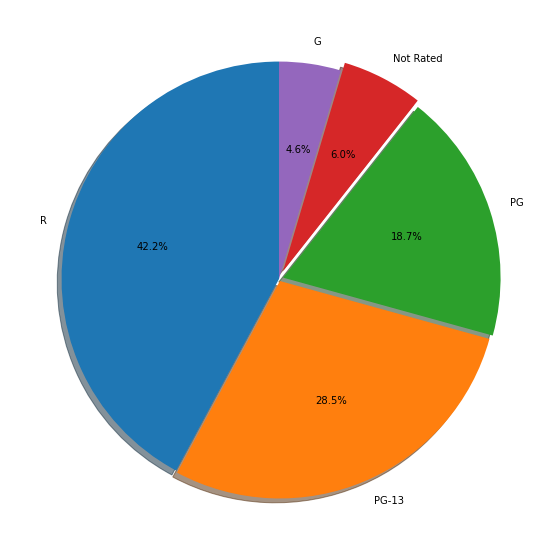

In [ ]:
plt.figure(figsize=(12,10))
movie_data['Rated'].value_counts()[:5]
plt.pie(movie_data['Rated'].value_counts().sort(by='count',descending=True)['count'].to_numpy()[:5],labels=movie_data['Rated'].value_counts().sort(by='count',descending=True)['Rated'].to_numpy()[:5],
        explode=[0,0.01,0.02,0.04,0],autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

more adult movies are being created followed by childern movies

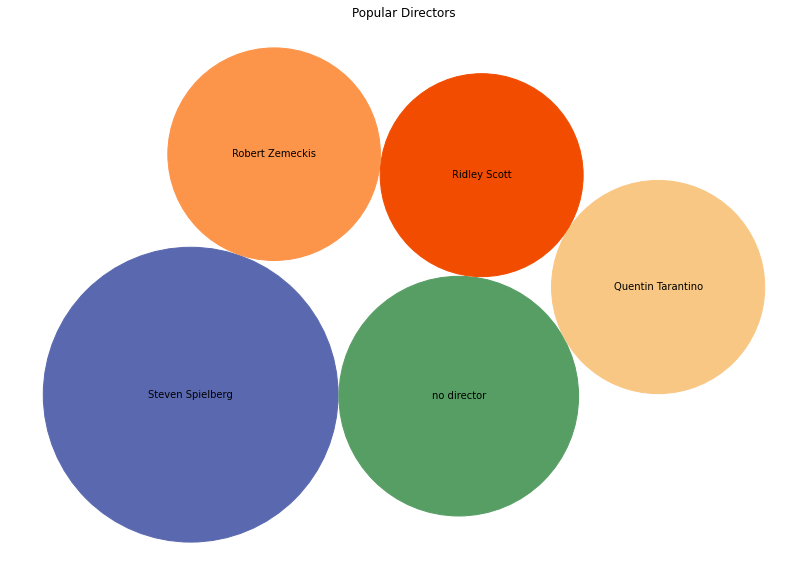

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


browser_market_share = {
    'browsers': movie_data['Director'].value_counts().sort(by='count',descending=True)['Director'].to_numpy()[:5],
    'market_share': movie_data['Director'].value_counts().sort(by='count',descending=True)['count'].to_numpy()[:5],
    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=browser_market_share['market_share'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"),figsize=(15,10))
bubble_chart.plot(
    ax, browser_market_share['browsers'], browser_market_share['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Popular Directors')

plt.show()

Steven Spielberg is the most popular director in the movie set

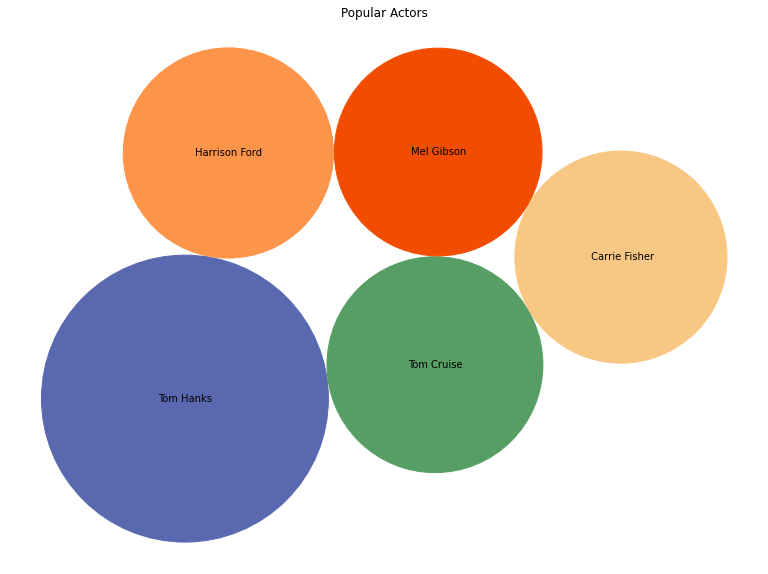

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


browser_market_share = {
    'browsers': movie_data.with_columns(pl.col('Actors').str.split(',')).explode('Actors')['Actors'].value_counts().sort(by='count',descending=True)['Actors'].to_numpy()[:5],
    'market_share': movie_data.with_columns(pl.col('Actors').str.split(',')).explode('Actors')['Actors'].value_counts().sort(by='count',descending=True)['count'].to_numpy()[:5],
    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=browser_market_share['market_share'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"),figsize=(15,10))
bubble_chart.plot(
    ax, browser_market_share['browsers'], browser_market_share['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Popular Actors')

plt.show()

Tom Hanks and Tom Cruise Rank as the most popular actors in the movie data

In [ ]:
movie_data.with_columns(pl.col('Country').str.split(',')).explode('Country').with_columns(pl.col('Country').map_batches(lambda x:x.str.strip()))['Country'].value_counts().sort(by='count',descending=True)['Country'].to_numpy()[:7]

array(['United States', 'United Kingdom', 'Germany', 'Canada', 'Japan',
       'France', 'Australia'], dtype=object)

<AxesSubplot:>

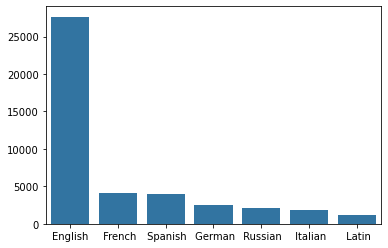

In [ ]:
x=movie_data.with_columns(pl.col('Language').str.split(',')).explode('Language')['Language'].value_counts().sort(by='count',descending=True)['Language'].to_numpy()[:7]
y=movie_data.with_columns(pl.col('Language').str.split(',')).explode('Language')['Language'].value_counts().sort(by='count',descending=True)['count'].to_numpy()[:7]
sns.barplot(x=x,y=y)

### Bivariate

### Feature Engineering and Preprocesssing

In [50]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [11]:
movie_data.columns

['movieId',
 'userId',
 'rating',
 'Title',
 'Year',
 'Rated',
 'Runtime',
 'Director',
 'Actors',
 'Plot',
 'Language',
 'Country',
 'Poster',
 'imdbRating',
 'Type',
 'Genres']

In [51]:
movie_data_comb = movie_data.with_columns((pl.col('Country')+ ' '+pl.col('Language')+' '+pl.col('Plot')+' '+pl.col('Director')+' '+pl.col('Actors')+' '+pl.col('Rated')+' '+pl.col('Runtime').cast(str)+' '+pl.col('Year').cast(str)+' '+pl.col('Genres')).alias('comb'))

In [ ]:
movie_data_comb['comb'].to_numpy()

array(['United States German, English As part of a fertility research project, a male scientist agrees to carry a pregnancy in his own body. Ivan Reitman Arnold Schwarzenegger, Danny DeVito, Emma Thompson PG-13 Comedy, Romance, Sci-Fi',
       'United States English Blacksmith Will Turner teams up with eccentric pirate "Captain" Jack Sparrow to save his love, the governor\'s daughter, from Jack\'s former pirate allies, who are now undead. Gore Verbinski Johnny Depp, Geoffrey Rush, Orlando Bloom PG-13 Action, Adventure, Fantasy',
       'India Telugu Chandu lives a normal life with his in laws in Hyderabad. One fine day, he comes across an aspiring actress Sonala helps her in a critical situation. The problems gets big and Chandu lands himself in a huge mess. Sriwass Nandamuri Balakrishna, Anjali, Sonal Chauhan Not Rated Action, Drama',
       ...,
       'United States English, Spanish A cyborg, identical to the one who failed to kill Sarah Connor, must now protect her ten year old son

In [52]:
movie_data_comb = movie_data_comb.to_pandas()

In [13]:
lemmatizer = WordNetLemmatizer()

In [14]:
def preprocess(df):
    review = re.sub('[^a-zA-Z0-9]', ' ', str(df))
    review = review.lower()
    review = review.split()
    review= [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words("english")]
    review = ' '.join(review)
    return review

In [53]:
movie_data_comb1 = movie_data_comb.copy()

In [17]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [54]:
movie_data_comb1['comb'] = movie_data_comb1['comb'].apply(preprocess)

In [ ]:
movie_data_comb['comb'][3]

'United States English, Spanish, French A shy student trying to reach his family in Ohio, a gun-toting bruiser in search of the last Twinkie and a pair of sisters striving to get to an amusement park join forces in a trek across a zombie-filled America. Ruben Fleischer Jesse Eisenberg, Emma Stone, Woody Harrelson R 88 2009 Action, Comedy, Horror'

In [ ]:
movie_data_comb1['comb'][2]

'india telugu chandu life normal life law hyderabad one fine day come across aspiring actress sonala help critical situation problem get big chandu land huge mess sriwass nandamuri balakrishna anjali sonal chauhan rated 155 2016 action drama'

In [37]:
movie_data_comb1

,movieId,userId,rating,Title,Year,Rated,Runtime,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres,comb
0,256,209929,1.0,Junior,1994,PG-13,109,Ivan Reitman,"Arnold Schwarzenegger, Danny DeVito, Emma Thom...","As part of a fertility research project, a mal...","German, English",United States,https://m.media-amazon.com/images/M/MV5BZDFhMm...,4.7,movie,"Comedy, Romance, Sci-Fi",united state german english part fertility res...
1,6539,238309,5.0,Pirates of the Caribbean: The Curse of the Bla...,2003,PG-13,143,Gore Verbinski,"Johnny Depp, Geoffrey Rush, Orlando Bloom",Blacksmith Will Turner teams up with eccentric...,English,United States,https://m.media-amazon.com/images/M/MV5BNGYyZG...,8.1,movie,"Action, Adventure, Fantasy",united state english blacksmith turner team ec...
2,94677,186814,5.0,Dictator,2016,Not Rated,155,Sriwass,"Nandamuri Balakrishna, Anjali, Sonal Chauhan",Chandu lives a normal life with his in laws in...,Telugu,India,https://m.media-amazon.com/images/M/MV5BNTg3Mj...,4.1,movie,"Action, Drama",india telugu chandu life normal life law hyder...
3,71535,225147,5.0,Zombieland,2009,R,88,Ruben Fleischer,"Jesse Eisenberg, Emma Stone, Woody Harrelson",A shy student trying to reach his family in Oh...,"English, Spanish, French",United States,https://m.media-amazon.com/images/M/MV5BMTU5MD...,7.6,movie,"Action, Comedy, Horror",united state english spanish french shy studen...
4,87222,45226,4.0,Kung Fu Panda 2,2011,PG,90,Jennifer Yuh Nelson,"Jack Black, Angelina Jolie, Jackie Chan",Po and his friends fight to stop a peacock vil...,"English, Russian","United States,Canada",https://m.media-amazon.com/images/M/MV5BYzQ0ZW...,7.2,movie,"Animation, Action, Adventure",united state canada english russian po friend ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29682,58,17091,2.5,Postman,1999,Not Rated,145,no director,"Mohan Babu, Soundarya, Raasi","Postman is a family-based movie in which, Vish...",Telugu,India,https://m.media-amazon.com/images/M/MV5BNGQ1OT...,3.6,movie,"Action, Drama",india telugu postman family based movie vishnu...
29683,44191,149331,3.0,V for Vendetta,2005,R,132,James McTeigue,"Hugo Weaving, Natalie Portman, Rupert Graves","In a future British dystopian society, a shado...","English, French, Latin, Spanish","United States,United Kingdom,Germany",https://m.media-amazon.com/images/M/MV5BOTI5OD...,8.2,movie,"Action, Drama, Sci-Fi",united state united kingdom germany english fr...
29684,589,124000,5.0,Terminator 2: Judgment Day,1991,R,137,James Cameron,"Arnold Schwarzenegger, Linda Hamilton, Edward ...","A cyborg, identical to the one who failed to k...","English, Spanish",United States,https://m.media-amazon.com/images/M/MV5BMGU2Nz...,8.6,movie,"Action, Sci-Fi",united state english spanish cyborg identical ...
29685,103,91399,5.0,Unforgettable,2011,TV-14,1,no director,"Poppy Montgomery, Dylan Walsh, James Hiroyuki ...","Carrie Wells, a former police detective, has a...",English,United States,https://m.media-amazon.com/images/M/MV5BMTYwMz...,6.8,series,"Crime, Drama, Mystery",united state english carrie well former police...


In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(movie_data_comb1,test_size=0.2,random_state=0)

In [ ]:
test

,movieId,userId,rating,Title,Year,Rated,Runtime,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres,comb
7670,81591,219063,3.5,Black Swan,2010,R,108,Darren Aronofsky,"Natalie Portman, Mila Kunis, Vincent Cassel",Nina is a talented but unstable ballerina on t...,"English, French, Italian",United States,https://m.media-amazon.com/images/M/MV5BNzY2Nz...,8.0,movie,"Drama, Thriller",united state english french italian nina talen...
8362,277,271371,4.0,Miracle on 34th Street,1947,Not Rated,96,George Seaton,"Edmund Gwenn, Maureen O'Hara, John Payne",After a divorced New York mother hires a nice ...,"English, Dutch",United States,https://m.media-amazon.com/images/M/MV5BNjRkOG...,7.9,movie,"Comedy, Drama, Family",united state english dutch divorced new york m...
23457,1377,185278,4.0,Batman Returns,1992,PG-13,126,Tim Burton,"Michael Keaton, Danny DeVito, Michelle Pfeiffer",While Batman deals with a deformed man calling...,English,"United States,United Kingdom",https://m.media-amazon.com/images/M/MV5BOGZmYz...,7.1,movie,"Action, Crime, Fantasy",united state united kingdom english batman dea...
25275,1876,78333,2.0,Deep Impact,1998,PG-13,120,Mimi Leder,"Robert Duvall, Téa Leoni, Elijah Wood",A comet is discovered to be on a collision cou...,"English, Russian",United States,https://m.media-amazon.com/images/M/MV5BYTUwMT...,6.2,movie,"Action, Drama, Sci-Fi",united state english russian comet discovered ...
21078,2167,330024,3.0,Blade,1998,R,120,Stephen Norrington,"Wesley Snipes, Stephen Dorff, Kris Kristofferson","A half-vampire, half-mortal man becomes a prot...","English, Russian, Serbian",United States,https://m.media-amazon.com/images/M/MV5BYTU1ZT...,7.1,movie,"Action, Horror, Sci-Fi",united state english russian serbian half vamp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23728,1272,315446,3.0,Patton,1970,PG,172,Franklin J. Schaffner,"George C. Scott, Karl Malden, Stephen Young",The World War II phase of the career of contro...,"English, German, French, Russian, Arabic, Italian",United States,https://m.media-amazon.com/images/M/MV5BZmRlMW...,7.9,movie,"Biography, Drama, War",united state english german french russian ara...
10570,592,282646,3.0,Batman,1989,PG-13,126,Tim Burton,"Michael Keaton, Jack Nicholson, Kim Basinger",The Dark Knight of Gotham City begins his war ...,"English, French, Spanish","United States,United Kingdom",https://m.media-amazon.com/images/M/MV5BZWQ0OT...,7.5,movie,"Action, Adventure",united state united kingdom english french spa...
8851,171763,63378,4.0,Baby Driver,2017,R,113,Edgar Wright,"Ansel Elgort, Jon Bernthal, Jon Hamm",After being coerced into working for a crime b...,"English, American Sign","United Kingdom,United States",https://m.media-amazon.com/images/M/MV5BMjM3Mj...,7.6,movie,"Action, Crime, Drama",united kingdom united state english american s...
10313,71264,91755,3.0,Cloudy with a Chance of Meatballs,2009,PG,90,"Phil Lord, Christopher Miller","Anna Faris, Bill Hader, Bruce Campbell",A local scientist is often regarded as a failu...,"English, French, Spanish, German",United States,https://m.media-amazon.com/images/M/MV5BMTg0Mj...,6.9,movie,"Animation, Adventure, Comedy",united state english french spanish german loc...


In [ ]:
train_pivot= pd.pivot_table(data=train,columns='userId',index='Title',values='rating',fill_value=0)

### Collaborative Filtering

In [ ]:
#item to item based collaborative filtering
train_pivot

userId,9,21,24,39,41,53,79,82,112,123,...,330884,330900,330901,330905,330908,330910,330912,330914,330921,330961
Title,,,,,,,,,,,,,,,,,,,,,
'Round Midnight,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0
10 Things I Hate About You,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0
101 Dalmatians,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0
12 Angry Men,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0
12 Years a Slave,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zookeeper,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0
Zoolander,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0
eXistenZ,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0


In [ ]:
train

,movieId,userId,rating,Title,Year,Rated,Runtime,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres,comb
19569,6765,166116,4.0,Under the Tuscan Sun,2003,PG-13,113,Audrey Wells,"Diane Lane, Raoul Bova, Sandra Oh",A writer impulsively buys a villa in Tuscany i...,"English, Italian, Polish, French, Spanish, German","United States,Italy",https://m.media-amazon.com/images/M/MV5BOGY5Zj...,6.7,movie,"Comedy, Drama, Romance",united state italy english italian polish fren...
16750,1779,308401,3.0,Sphere,1998,PG-13,134,Barry Levinson,"Dustin Hoffman, Sharon Stone, Samuel L. Jackson",A spaceship is discovered under three hundred ...,English,United States,https://m.media-amazon.com/images/M/MV5BMTYyMT...,6.1,movie,"Action, Mystery, Sci-Fi",united state english spaceship discovered thre...
19691,420,290721,4.0,Beverly Hills Cop III,1994,R,104,John Landis,"Eddie Murphy, Jon Tenney, Joey Travolta","Axel Foley, while investigating a car theft ri...","English, French",United States,https://m.media-amazon.com/images/M/MV5BMjNhYW...,5.5,movie,"Action, Comedy, Crime",united state english french axel foley investi...
10639,53000,857,3.5,28 Weeks Later,2007,R,100,Juan Carlos Fresnadillo,"Jeremy Renner, Rose Byrne, Robert Carlyle",Six months after the rage virus was inflicted ...,English,"United Kingdom,Spain,United States",https://m.media-amazon.com/images/M/MV5BMTUxMj...,6.9,movie,"Horror, Sci-Fi",united kingdom spain united state english six ...
1832,72378,150750,3.0,2012,2009,PG-13,158,Roland Emmerich,"John Cusack, Thandiwe Newton, Chiwetel Ejiofor",A frustrated writer struggles to keep his fami...,"English, French, Tibetan, Mandarin, Russian, H...",United States,https://m.media-amazon.com/images/M/MV5BMTY0Mj...,5.8,movie,"Action, Adventure, Sci-Fi",united state english french tibetan mandarin r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,6016,40563,4.5,City of God,2002,R,130,"Fernando Meirelles, Kátia Lund","Alexandre Rodrigues, Leandro Firmino, Matheus ...","In the slums of Rio, two kids' paths diverge a...",Portuguese,"Brazil,France,Germany",https://m.media-amazon.com/images/M/MV5BMGU5OW...,8.6,movie,"Crime, Drama",brazil france germany portuguese slum rio two ...
19648,432,102847,3.0,City Slickers II: The Legend of Curly's Gold,1994,PG-13,116,Paul Weiland,"Billy Crystal, Jack Palance, Daniel Stern","One year after their first adventure, Mitch Ro...",English,United States,https://m.media-amazon.com/images/M/MV5BZjQ3Nz...,5.6,movie,"Comedy, Western",united state english one year first adventure ...
9845,595,125069,4.0,Beauty and the Beast,1991,G,84,"Gary Trousdale, Kirk Wise","Paige O'Hara, Robby Benson, Jesse Corti",A prince cursed to spend his days as a hideous...,"English, French","United States,Japan",https://m.media-amazon.com/images/M/MV5BMzE5MD...,8.0,movie,"Animation, Family, Fantasy",united state japan english french prince curse...
10799,1193,20329,1.0,One Flew Over the Cuckoo's Nest,1975,R,133,Milos Forman,"Jack Nicholson, Louise Fletcher, Michael Berryman","In the Fall of 1963, a Korean War veteran and ...",English,United States,https://m.media-amazon.com/images/M/MV5BZjA0OW...,8.7,movie,Drama,united state english fall 1963 korean war vete...


In [ ]:
train_pivot

userId,9,21,24,39,41,53,79,82,112,123,...,330884,330900,330901,330905,330908,330910,330912,330914,330921,330961
Title,,,,,,,,,,,,,,,,,,,,,
'Round Midnight,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0
10 Things I Hate About You,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0
101 Dalmatians,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0
12 Angry Men,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0
12 Years a Slave,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zookeeper,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0
Zoolander,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0
eXistenZ,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,0,0.0,0,0,0.0,0,0,0


In [ ]:
from scipy.sparse import csr_matrix
train_pivot_matrix = csr_matrix(train_pivot)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(train_pivot)
item_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
train.columns

Index(['movieId', 'userId', 'rating', 'Title', 'Year', 'Rated', 'Runtime',
       'Director', 'Actors', 'Plot', 'Language', 'Country', 'Poster',
       'imdbRating', 'Type', 'Genres', 'comb'],
      dtype='object')

In [ ]:
item_similarity_df = pd.DataFrame(item_similarity,index=train_pivot.index,columns=train_pivot.index)
item_similarity_df

Title,'Round Midnight,10 Things I Hate About You,101 Dalmatians,12 Angry Men,12 Years a Slave,127 Hours,13 Hours,15 Minutes,16 Blocks,1917,...,Zack and Miri Make a Porno,Zelig,Zero Effect,Zodiac,Zombieland,Zookeeper,Zoolander,eXistenZ,xXx: Return of Xander Cage,xXx: State of the Union
Title,,,,,,,,,,,,,,,,,,,,,
'Round Midnight,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Years a Slave,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zookeeper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Zoolander,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
eXistenZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Not a good result of similarity, this is due to the fact most movies were just rated by single user or 2, memory based approach won't work due to this, we need to use a model based approach for collaborative filtering

![image-2.png](attachment:image-2.png)

In [ ]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(movie_data_comb1[['userId', 'movieId', 'rating']], reader)


trainset, testset = train_test_split(data, test_size=0.2)

algo = SVD()

algo.fit(trainset)

predictions = algo.test(testset)
accuracy.rmse(predictions)

ModuleNotFoundError: No module named 'surprise'

In [ ]:
user_id = 1
all_movie_ids = set(ratings['movieId'])
rated_movie_ids = set(ratings[ratings['userId'] == user_id]['movieId'])
unrated_movie_ids = list(all_movie_ids - rated_movie_ids)
predictions = [algo.predict(user_id, movie_id) for movie_id in unrated_movie_ids]
predictions.sort(key=lambda x: x.est, reverse=True)
top_recommendations = predictions[:10]
print("Top Recommendations for User", user_id)
for i, pred in enumerate(top_recommendations, 1):
    print(f"{i}. MovieId: {pred.iid}, Estimated Rating: {pred.est}")

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

user_item_matrix = movie_data_comb1.drop_duplicates().pivot(index='userId', columns='movieId', values='rating').fillna(0)
X = user_item_matrix.values

svd = TruncatedSVD(n_components=50, random_state=42)
X_svd = svd.fit_transform(X)
item_item_similarity = cosine_similarity(X_svd.T)

def recommend(user_id, num_recommendations=10):
    user_ratings = user_item_matrix.loc[user_id].values.reshape(1, -1)
    predicted_ratings = np.dot(X_svd, user_ratings.T)
    predicted_ratings[user_ratings.flatten() != 0] = -1
    top_indices = np.argsort(predicted_ratings.flatten())[::-1][:num_recommendations]
    top_movie_ids = user_item_matrix.columns[top_indices]
    return top_movie_ids

# # Example usage: Get top recommendations for user 1
# user_id = 1
# recommendations = recommend(user_id)
# print("Top recommendations for user", user_id, ":", recommendations)


In [ ]:
X_svd.shape

(25050, 1)

In [ ]:
user_id = 9
recommendations = recommend(user_id)
print("Top recommendations for user", user_id, ":", recommendations)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 25050 but corresponding boolean dimension is 2290

In [ ]:
import numpy as np
X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1],[3,3]])
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [ ]:
train.reset_index(drop=True,inplace=True)

In [105]:
movie_pivot = movie_data_comb1.pivot_table(index='userId',columns='movieId',values='rating').fillna(0)

In [108]:
movie_pivot

movieId,1,2,5,6,7,9,10,13,14,16,...,278578,278632,278964,279410,280218,280814,281096,281190,282413,285301
userId,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
import progressbar as pb
from sklearn.base import RegressorMixin, BaseEstimator



class MatrixFactorization(BaseEstimator, RegressorMixin):
    def __init__(self,alpha=0.01,beta=0.01,iterations=1):
        self.beta = beta
        self.alpha = alpha
        self.iterations = iterations

    def fit(self,R,P,Q,K):
      for i in range(self.iterations):
          for u in range(n_users):
              for m in range(n_movies):
                  if R[u, m] > 0:
                      pred = np.dot(P[u, :], Q[m, :].T)
                      error = R[u, m] - pred
                      P[u, :] = P[u, :] + self.alpha * (error * Q[m, :] - self.beta * P[u, :])
                      Q[m, :] = Q[m, :] + self.alpha * (error * P[u, :] - self.beta * Q[m, :])
          error = 0
          for u in range(n_users):
              for m in range(n_movies):
                  if R[u, m] > 0:
                      error += (R[u, m] - np.dot(P[u, :], Q[m, :].T))**2
                      error += (self.beta/2) * (np.linalg.norm(P[u, :])**2 + np.linalg.norm(Q[m, :])**2)
          if (i+1) % 10 == 0:
              print(f'Iteration: {i+1}, error: {error}')

      predictions = np.dot(P, Q.T)

      predictions_df = pd.DataFrame(predictions, columns=movie_pivot.columns, index=movie_pivot.index)
      return predictions_df

    def get_title_from_index(self,df,id):
      return df[df.movieId == id]['Title'].values[0]
    def get_index_from_title(self,df,title):
      return df[df.Title==title].index.values[0]

    def predict(self,userId,n):

      if userId not in movie_data_comb1['userId'].unique():
        return('Sorry! The user is not in our database. Try content based')

      user_ratings = movie_data_comb1[movie_data_comb1['userId'] == userId]
      user_predictions = predictions_df.loc[user_id]
      user_predictions = user_predictions[~user_predictions.index.isin(user_ratings['movieId'])]
      user_predictions = user_predictions.sort_values(ascending=False)
      user_predictions = user_predictions.head(n)
      predictions = []
      for movie in user_predictions.index.values:
#     if get_title_from_index(train,movie) == movie_user_likes:
#         continue
        predictions.append(self.get_title_from_index(movie_data_comb1,movie))
        # print(movie)
      return predictions

In [109]:
k = 20
n_users = movie_data_comb1['userId'].nunique()
n_movies = movie_data_comb1['movieId'].nunique()
R = movie_pivot.to_numpy()
P = np.random.normal(scale=1./k, size=(n_users, k))
Q = np.random.normal(scale=1./k, size=(n_movies, k))

In [202]:
matrixfac = MatrixFactorization()

predictions_df = matrixfac.fit(R,P,Q,k)

In [205]:
matrixfac.predict(user_id,5)

["It's a Wonderful Life",
 'Apocalypse Now',
 'Batman Forever',
 'Citizen Kane',
 'Ex Machina']

### Content Based Filtering

In [165]:
train_df = movie_data_comb1.drop(columns=['userId','rating'])

In [166]:
train_df.shape

(29687, 15)

In [167]:
train_df=train_df.drop_duplicates().reset_index(drop=True)
train_df

,movieId,Title,Year,Rated,Runtime,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres,comb
0,256,Junior,1994,PG-13,109,Ivan Reitman,"Arnold Schwarzenegger, Danny DeVito, Emma Thom...","As part of a fertility research project, a mal...","German, English",United States,https://m.media-amazon.com/images/M/MV5BZDFhMm...,4.7,movie,"Comedy, Romance, Sci-Fi",united state german english part fertility res...
1,6539,Pirates of the Caribbean: The Curse of the Bla...,2003,PG-13,143,Gore Verbinski,"Johnny Depp, Geoffrey Rush, Orlando Bloom",Blacksmith Will Turner teams up with eccentric...,English,United States,https://m.media-amazon.com/images/M/MV5BNGYyZG...,8.1,movie,"Action, Adventure, Fantasy",united state english blacksmith turner team ec...
2,94677,Dictator,2016,Not Rated,155,Sriwass,"Nandamuri Balakrishna, Anjali, Sonal Chauhan",Chandu lives a normal life with his in laws in...,Telugu,India,https://m.media-amazon.com/images/M/MV5BNTg3Mj...,4.1,movie,"Action, Drama",india telugu chandu life normal life law hyder...
3,71535,Zombieland,2009,R,88,Ruben Fleischer,"Jesse Eisenberg, Emma Stone, Woody Harrelson",A shy student trying to reach his family in Oh...,"English, Spanish, French",United States,https://m.media-amazon.com/images/M/MV5BMTU5MD...,7.6,movie,"Action, Comedy, Horror",united state english spanish french shy studen...
4,87222,Kung Fu Panda 2,2011,PG,90,Jennifer Yuh Nelson,"Jack Black, Angelina Jolie, Jackie Chan",Po and his friends fight to stop a peacock vil...,"English, Russian","United States,Canada",https://m.media-amazon.com/images/M/MV5BYzQ0ZW...,7.2,movie,"Animation, Action, Adventure",united state canada english russian po friend ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,113348,Teenage Mutant Ninja Turtles,2014,PG-13,101,Jonathan Liebesman,"Megan Fox, Will Arnett, William Fichtner","When a kingpin threatens New York City, a grou...","English, Japanese",United States,https://m.media-amazon.com/images/M/MV5BNjUzOD...,5.8,movie,"Action, Adventure, Comedy",united state english japanese kingpin threaten...
2286,90343,Footloose,1984,PG,107,Herbert Ross,"Kevin Bacon, Lori Singer, John Lithgow",A city teenager moves to a small town where ro...,English,United States,https://m.media-amazon.com/images/M/MV5BMGZjZW...,6.6,movie,"Drama, Music, Romance",united state english city teenager move small ...
2287,110447,Her Master's Voice,2012,Not Rated,64,Nina Conti,"Nina Conti, Jim Broadbent, Daisy Campbell",Internationally acclaimed ventriloquist Nina C...,English,"United Kingdom,United States",https://m.media-amazon.com/images/M/MV5BMTcxMD...,7.4,movie,"Documentary, Biography, Comedy",united kingdom united state english internatio...
2288,2241,Class,1983,R,98,Lewis John Carlino,"Jacqueline Bisset, Rob Lowe, Andrew McCarthy",A young man in private school spends one crazy...,English,United States,https://m.media-amazon.com/images/M/MV5BMTczNW...,6.0,movie,"Comedy, Drama, Romance",united state english young man private school ...


In [187]:
train_df['Title'] = train_df['Title'].apply(lambda x: x.lower())

In [188]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
cv = CountVectorizer()

count_matrix = cv.fit_transform(train_df['comb'])
similarity = cosine_similarity(count_matrix)

In [189]:
similarity

array([[1.        , 0.14617634, 0.        , ..., 0.11688115, 0.16137431,
        0.08164966],
       [0.14617634, 1.        , 0.02500782, ..., 0.08200924, 0.08492078,
        0.09548198],
       [0.        , 0.02500782, 1.        , ..., 0.039992  , 0.05521576,
        0.02328101],
       ...,
       [0.11688115, 0.08200924, 0.039992  , ..., 1.        , 0.11316968,
        0.07634644],
       [0.16137431, 0.08492078, 0.05521576, ..., 0.11316968, 1.        ,
        0.10540926],
       [0.08164966, 0.09548198, 0.02328101, ..., 0.07634644, 0.10540926,
        1.        ]])

In [ ]:
train_df[train_df.Title=="Clash of the Titans"].index.values

array([1571, 1994], dtype=int64)

In [ ]:
train_df.drop_duplicates()

,movieId,rating,Title,Year,Rated,Runtime,Director,Actors,Plot,Language,Country,Poster,imdbRating,Type,Genres,comb
0,256,1.0,Junior,1994,PG-13,109,Ivan Reitman,"Arnold Schwarzenegger, Danny DeVito, Emma Thom...","As part of a fertility research project, a mal...","German, English",United States,https://m.media-amazon.com/images/M/MV5BZDFhMm...,4.7,movie,"Comedy, Romance, Sci-Fi",united state german english part fertility res...
1,6539,5.0,Pirates of the Caribbean: The Curse of the Bla...,2003,PG-13,143,Gore Verbinski,"Johnny Depp, Geoffrey Rush, Orlando Bloom",Blacksmith Will Turner teams up with eccentric...,English,United States,https://m.media-amazon.com/images/M/MV5BNGYyZG...,8.1,movie,"Action, Adventure, Fantasy",united state english blacksmith turner team ec...
2,94677,5.0,Dictator,2016,Not Rated,155,Sriwass,"Nandamuri Balakrishna, Anjali, Sonal Chauhan",Chandu lives a normal life with his in laws in...,Telugu,India,https://m.media-amazon.com/images/M/MV5BNTg3Mj...,4.1,movie,"Action, Drama",india telugu chandu life normal life law hyder...
3,71535,5.0,Zombieland,2009,R,88,Ruben Fleischer,"Jesse Eisenberg, Emma Stone, Woody Harrelson",A shy student trying to reach his family in Oh...,"English, Spanish, French",United States,https://m.media-amazon.com/images/M/MV5BMTU5MD...,7.6,movie,"Action, Comedy, Horror",united state english spanish french shy studen...
4,87222,4.0,Kung Fu Panda 2,2011,PG,90,Jennifer Yuh Nelson,"Jack Black, Angelina Jolie, Jackie Chan",Po and his friends fight to stop a peacock vil...,"English, Russian","United States,Canada",https://m.media-amazon.com/images/M/MV5BYzQ0ZW...,7.2,movie,"Animation, Action, Adventure",united state canada english russian po friend ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516,6287,2.5,Anger Management,2003,PG-13,106,Peter Segal,"Jack Nicholson, Adam Sandler, Marisa Tomei",Dave Buznik is a businessman who is wrongly se...,English,United States,https://m.media-amazon.com/images/M/MV5BMDg1YT...,6.2,movie,Comedy,united state english dave buznik businessman w...
9517,5971,3.5,My Neighbor Totoro,1988,G,86,Hayao Miyazaki,"Hitoshi Takagi, Noriko Hidaka, Chika Sakamoto",When two girls move to the country to be near ...,Japanese,Japan,https://m.media-amazon.com/images/M/MV5BYzJjMT...,8.1,movie,"Animation, Comedy, Family",japan japanese two girl move country near aili...
9518,106696,2.0,Frozen,2013,PG,102,"Chris Buck, Jennifer Lee","Kristen Bell, Idina Menzel, Jonathan Groff",When the newly crowned Queen Elsa accidentally...,"English, Norwegian",United States,https://m.media-amazon.com/images/M/MV5BMTQ1Mj...,7.4,movie,"Animation, Adventure, Comedy",united state english norwegian newly crowned q...
9519,58,2.5,Postman,1999,Not Rated,145,no director,"Mohan Babu, Soundarya, Raasi","Postman is a family-based movie in which, Vish...",Telugu,India,https://m.media-amazon.com/images/M/MV5BNGQ1OT...,3.6,movie,"Action, Drama",india telugu postman family based movie vishnu...


In [ ]:
train_df=train.reset_index(drop=True)

In [ ]:
train_df[train_df.index == 6803]['Title'].values[0]

'Philadelphia'

In [ ]:
train_df.reset_index(drop=True,inplace=True)

In [193]:
class ContentBased:
  def __init__(self):
    pass

  def get_title_from_index(self,df,index):
    return df[df.index == index]['Title'].values[0]

  def get_index_from_title(self,df,title):
    return df[df.Title==title].index.values[0]

  def recommend(self,movie_user_likes):

    if movie_user_likes not in train_df['Title'].unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    movie_index=self.get_index_from_title(train_df,movie_user_likes)
    similar_movies = list(enumerate(similarity[movie_index]))
    sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1],reverse=True)
    i = 0
    recommend = []
    for movie in sorted_similar_movies:
        if self.get_title_from_index(train_df,movie[0]) == movie_user_likes:
            continue
        recommend.append(self.get_title_from_index(train_df,movie[0]))
        i+=1
        if i == 10:
            break
    return recommend

In [198]:
content = ContentBased()

recommend = content.recommend('avatar')

In [199]:
recommend

['avatar: the way of water',
 'clash of the titans',
 'clash of the titans',
 'suicide squad',
 'wrath of the titans',
 'wyatt earp',
 'aliens',
 'doctor strange',
 "charlie's angels: full throttle",
 'mortal kombat: annihilation']